# Learning the XOR function with a multilayer perceptron

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/199px-Colored_neural_network.svg.png" align="right">](https://en.wikipedia.org/wiki/Multilayer_perceptron)

*From Wikipedia, the free encyclopedia*

A [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs. An MLP consists of multiple layers of nodes in a directed graph, with each layer fully connected to the next one. Except for the input nodes, each node is a neuron (or processing element) with a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training the network. MLP is a modification of the standard linear perceptron and can distinguish data that are not linearly separable.

Consequently, MLP can outperform the perceptron and solve the XOR problem.

In [64]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import joblib

import matplotlib.pyplot as plt
from packages.plot import plot_decision_boundary, plot_data
%matplotlib inline

## Load in the data

This is the data for the truth table of the XOR function.

In [65]:
x = np.array([[0.,0.],\
              [0.,1.],\
              [1.,0.],\
              [1.,1.]])
y = np.array([0.,1.,1.,0.])

## Build the model

Create a [MLP object](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) with the following arguments:
* [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) solver (standard technique in [backpropagation](https://en.wikipedia.org/wiki/Backpropagation))
* one hidden layer with 5 neurons
* 4000 iterations maximum

The rest of the arguments are set to their default values ([see documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)).

In [66]:
net = MLPClassifier(solver='sgd',\
                    hidden_layer_sizes=(5, ),\
                    max_iter=4000)

## Train

The `fit` function automatically iterates until convergence or the maximum number of iterations is reached, so you only need to execute the following cell once. When the loss or score is not improving by at least *tol* (default 1e-4) for two consecutive iterations, convergence is considered to be reached and training stops.

In [67]:
net.fit(x,y)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=4000, solver='sgd')

## Plot the data

The following figure displays the XOR data and the decision boundary of the MLP. This boundary is not linear anymore: it is represented in colors, so that the blue region in the plane corresponds to the features that are classified as 0's and consequently the brown region is classified as 1's.

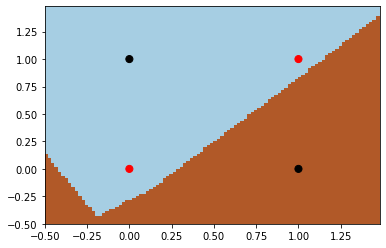

In [68]:
plot_decision_boundary(net,x,y)
plot_data(x, y)

### Success or failure?

There is not a unique solution to this problem. The figure below depicts some possible solutions:

<table border="0">
<tr><td>
<img src="img/xor_1.png" width=200>
</td><td>
<img src="img/xor_2.png" width=200>
</td><td>
<img src="img/xor_3.png" width=200>
</td></tr><tr><td>
<img src="img/xor_4.png" width=200>
</td><td>
<img src="img/xor_5.png" width=200>
</td><td>
<img src="img/xor_6.png" width=200>
</td></tr>
</table>

However, the network may **not** converge. Sometimes, it can get stuck in a local minima. The algorithm stops but the result is not correct at all. For example:

<table border="0">
<tr><td>
<img src="img/xor_fail_1.png" width=200>
</td><td>
<img src="img/xor_fail_2.png" width=200>
</td><td>
<img src="img/xor_fail_3.png" width=200>
</td></tr>
</table>

Check the result of your network. You should find at least one convergent network, and one non-converging network. Then use the code below for saving each of the networks into a separate file. The networks can later be loaded and analysed without need of training.

## Non-converging network

Percentage of correct classification of the training data:

In [69]:
net.score(x,y) * 100

75.0

Number of iterations during training:

In [70]:
net.n_iter_

1039

Loss curve: (currently, [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) supports only the [Cross-Entropy loss function](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression))

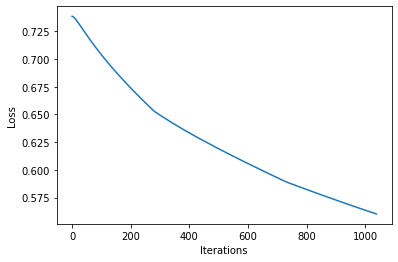

In [71]:
plt.plot(net.loss_curve_);
plt.xlabel('Iterations');
plt.ylabel('Loss');

Save the network into a file.

In [72]:
joblib.dump(net, 'xor_converging.pkl') 

['xor_non_converging.pkl']

## Converged network

Percentage of correct classification of the training data:

In [59]:
net.score(x,y) * 100

50.0

Number of iterations during training:

In [60]:
net.n_iter_

12

Loss curve: (currently, [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) supports only the [Cross-Entropy loss function](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression))

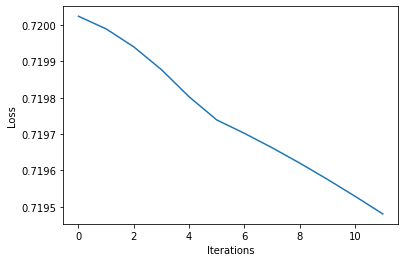

In [61]:
plt.plot(net.loss_curve_);
plt.xlabel('Iterations');
plt.ylabel('Loss');

Save the network into a file.

In [62]:
joblib.dump(net, 'xor_converged.pkl') 

['xor_converged.pkl']

You should now check the saved files in [this notebook](XOR_checked.ipynb).